# Linear Regression


In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [21]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

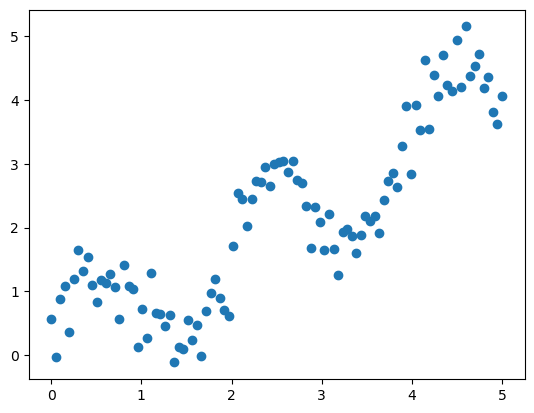

In [22]:
plt.scatter(x,y)

#### nonlinear

In [23]:
regr_lin = LinearRegression()

In [24]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [25]:
regr_lin.fit(X,y)

LinearRegression()

0.5463093104422794


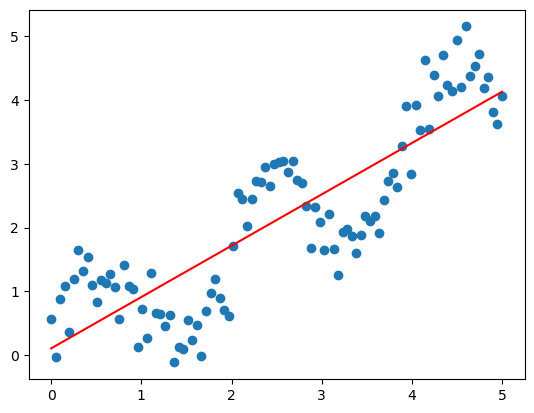

In [26]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [27]:
print(x.shape)

(100,)


In [28]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [29]:
regr_poly = LinearRegression()

In [30]:
regr_poly.fit(X_poly, y)

LinearRegression()

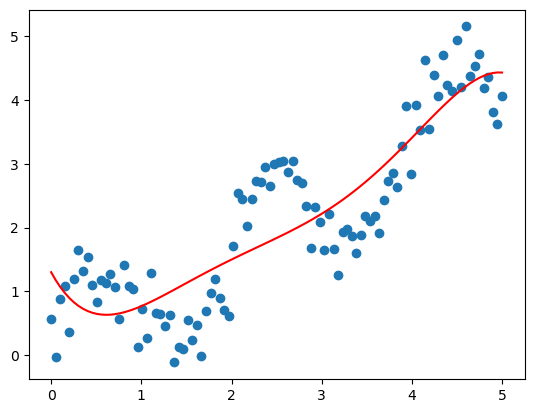

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [32]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.60884782  3.28204599 -1.49611086  0.31419049 -0.02407378]
interception:  1.298954178056635


In [33]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.29895418, 1.1753752 , 1.06741159, 0.97397934, 0.89404158,
       0.82660766, 0.7707322 , 0.72551414, 0.69009577, 0.66366181,
       0.64543844, 0.63469236, 0.63072985, 0.63289579, 0.64057275,
       0.65318   , 0.6701726 , 0.69104043, 0.71530722, 0.74252967,
       0.7722964 , 0.80422709, 0.8379715 , 0.8732085 , 0.90964513,
       0.94701568, 0.98508071, 1.02362611, 1.06246215, 1.10142252,
       1.1403634 , 1.17916252, 1.21771817, 1.25594827, 1.29378945,
       1.33119605, 1.36813922, 1.40460591, 1.440598  , 1.47613128,
       1.51123454, 1.5459486 , 1.58032538, 1.61442694, 1.64832453,
       1.68209764, 1.71583304, 1.74962388, 1.78356867, 1.81777038,
       1.85233547, 1.88737295, 1.92299343, 1.95930816, 1.9964281 ,
       2.03446296, 2.07352022, 2.11370425, 2.1551153 , 2.19784858,
       2.24199329, 2.28763171, 2.3348382 , 2.38367828, 2.43420769,
       2.4864714 , 2.54050271, 2.59632227, 2.65393714, 2.71333984,
       2.77450739, 2.83740039, 2.90196203, 2.96811717, 3.03577

In [34]:
regr_poly.predict(X_poly)

array([1.29895418, 1.1753752 , 1.06741159, 0.97397934, 0.89404158,
       0.82660766, 0.7707322 , 0.72551414, 0.69009577, 0.66366181,
       0.64543844, 0.63469236, 0.63072985, 0.63289579, 0.64057275,
       0.65318   , 0.6701726 , 0.69104043, 0.71530722, 0.74252967,
       0.7722964 , 0.80422709, 0.8379715 , 0.8732085 , 0.90964513,
       0.94701568, 0.98508071, 1.02362611, 1.06246215, 1.10142252,
       1.1403634 , 1.17916252, 1.21771817, 1.25594827, 1.29378945,
       1.33119605, 1.36813922, 1.40460591, 1.440598  , 1.47613128,
       1.51123454, 1.5459486 , 1.58032538, 1.61442694, 1.64832453,
       1.68209764, 1.71583304, 1.74962388, 1.78356867, 1.81777038,
       1.85233547, 1.88737295, 1.92299343, 1.95930816, 1.9964281 ,
       2.03446296, 2.07352022, 2.11370425, 2.1551153 , 2.19784858,
       2.24199329, 2.28763171, 2.3348382 , 2.38367828, 2.43420769,
       2.4864714 , 2.54050271, 2.59632227, 2.65393714, 2.71333984,
       2.77450739, 2.83740039, 2.90196203, 2.96811717, 3.03577

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [35]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [36]:
sigma = 0.3

In [37]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [38]:
regr_rbf = LinearRegression()

In [39]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

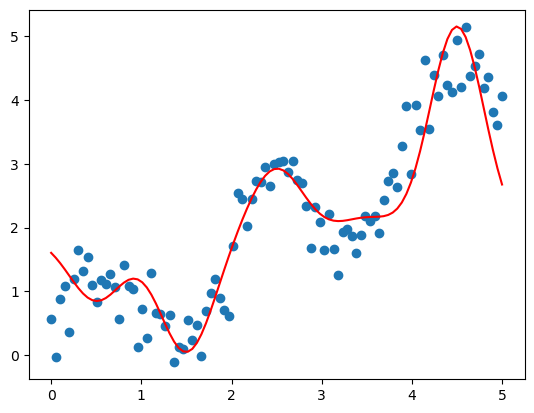

In [40]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [41]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.99731795 -1.80453652  1.07821283  0.29428029  3.30195997]
interception:  1.851639142807365


#### Comparison

In [42]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

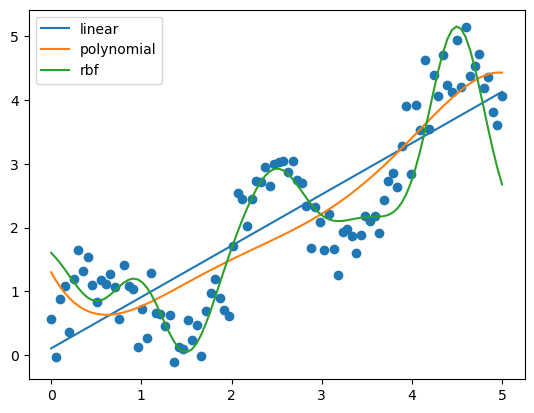

In [43]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [28]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6099512206136817


In [29]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5531666918302569


In [30]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.28356996943295043
